<a href="https://colab.research.google.com/github/dBenazzi/trash-can/blob/main/programmazione_di_applicazioni_data_intensive/Regressione_non_Lineare_parte_1.nosol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione con scikit-learn

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
`nome.cognome@unibo.it`

## Setup

- Importare i package necessari

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Ripasso: Regressione lineare

- Un _modello di regressione_ fornisce una stima $\hat{y}$ del valore $y$ di una variabile _dipendente_ basata sui valori $x_1,\ldots,x_n$ di una o più variabili _indipendenti_
- In un modello di regressione _lineare_, il valore della variabile dipendente è previsto come combinazione lineare di quelli delle variabili indipendenti
  - ciascuna variabile indipendente $x_i$ è moltiplicata per un coefficiente $\theta_i$
  - viene aggiunto un termine noto (_intercetta_) $\theta_0$
$$ \hat{y} = \theta_0+\theta_1\cdot x_1+\ldots+\theta_n\cdot x_n $$
- Nella scorsa lezione, abbiamo visto come implementare la _discesa del gradiente_ per addestrare un modello di regressione lineare su dati esistenti
- Vediamo oggi come usare invece una libreria che fornisce questa funzione e altre più avanzate...

## scikit-learn

- scikit-learn offre diversi algoritmi e funzioni di supporto per l'addestramento di modelli predittivi, dalla regressione lineare ad altri più avanzati
  - tutti i tipi di modelli offrono un'interfaccia comune per l'addestramento e la predizione (inferenza)
  - i dati in ingresso sono rappresentati come array NumPy o serie/frame pandas
  - sono fornite funzionalità di supporto (suddivisione dati, normalizzazione, ...) compatibili con tutti i tipi di modelli

## Caso di studio 1: predizione consumo elettricità

- Carichiamo i dati già visti nel laboratorio precedente: per ogni giorno degli anni dal 2015 al 2017 abbiamo la temperatura media in una città e il picco registrato di consumo di corrente elettrica
  - con l'opzione `index_col` specifichiamo che la colonna `date` costituisce l'indice del DataFrame
  - con `parse_dates` indichiamo che i suoi valori vanno interpretati come date

In [3]:
import os.path
if not os.path.exists("power.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/vpaM1", "power.csv")

In [4]:
power = pd.read_csv("https://git.io/vpaM1", index_col="date", parse_dates=["date"])

In [5]:
power.head(8)

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0
2015-01-06,2.122799,-6.7
2015-01-07,2.243265,-9.4
2015-01-08,2.240975,-8.9


### Predizione nei mesi estivi

- Nella scorsa esercitazione, abbiamo estratto un modello di predizione sui consumi dei mesi estivi, imputabili all'aria condizionata
- Selezioniamo dal frame caricato solamente le righe relative ai mesi di giugno, luglio e agosto

In [6]:
power_summer = power.iloc[power.index.month.isin([6, 7, 8])]

In [7]:
power_summer.head(3)

,demand,temp
date,,
2015-06-01,1.640036,15.6
2015-06-02,1.663211,17.2
2015-06-03,1.728381,21.7


## Addestramento di un modello

- Vediamo come addestrare un modello di regressione lineare su questi dati
- Per prima cosa, va creato un oggetto che rappresenta il modello "vuoto", non ancora addestrato
- A seconda del tipo di modello da addestrare, utilizziamo una classe diversa
- Per un modello di regressione lineare semplice (univariata o multivariata), creiamo un oggetto `LinearRegression`, importandolo dal package dei modelli lineari

In [8]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

- Usiamo quindi il metodo `fit` per addestrare il modello su un insieme di dati fornito
- Al metodo `fit` vanno passati come argomenti
  - una matrice (o DataFrame) di forma $m\times n$, contenente $m$ osservazioni di $n$ variabili indipendenti $X_1,\ldots,X_n$
  - un vettore (o serie) di $m$ elementi, contenenti i corrispondenti valori noti della variabilie dipendente $Y$
- Nel caso di regressione univariata con una variabile indipendente $X$, va passata una matrice $m\times 1$ per esplicitare che si tratta di $m$ osservazioni di una variabile (piuttosto che di una osservazione di $n$ variabili)
- Selezionando la colonna `temp` come una lista (`[["temp"]]` invece di `["temp"]`), ottengo un DataFrame $m\times 1$ invece di una semplice serie

In [9]:
X = power_summer[["temp"]]
y = power_summer["demand"]

In [10]:
X.head()

,temp
date,
2015-06-01,15.6
2015-06-02,17.2
2015-06-03,21.7
2015-06-04,25.0
2015-06-05,27.8


In [11]:
y.head()

date
2015-06-01    1.640036
2015-06-02    1.663211
2015-06-03    1.728381
2015-06-04    1.921615
2015-06-05    2.153111
Name: demand, dtype: float64

- `X` e `y` possono essere passate quindi come argomenti al metodo `fit`

In [12]:
lrm.fit(X, y)

LinearRegression()

- `lrm` è ora un modello addestrato e può essere utilizzato per effettuare predizioni

## Inferenza

- Una volta che il modello è addestrato, possiamo ottenere predizioni col metodo `predict`
  - va data in input una matrice o frame $m\times n$ di osservazioni delle variabili indipendenti
  - è restituito un vettore di $m$ valori della variabile dipendente previsti dal modello
- Ad esempio, passiamo gli stessi dati usati per l'addestramento per vedere le predizioni del modello

In [13]:
preds = lrm.predict(X)

- Vediamo alcuni dei valori predetti

In [14]:
preds[:5]

array([1.1829682 , 1.31947545, 1.7034021 , 1.9849483 , 2.22383599])

- `predict` restituisce **sempre** un array NumPy, per ottenere una serie pandas è necessario applicare manualmente le etichette
  - si possono copiare quelle delle righe del frame dato in input

In [15]:
preds = pd.Series(preds, index=power_summer.index)

In [16]:
preds.head()

date
2015-06-01    1.182968
2015-06-02    1.319475
2015-06-03    1.703402
2015-06-04    1.984948
2015-06-05    2.223836
dtype: float64

## Parametri del modello

- Una volta addestrato il modello possiamo consultarne i parametri tramite due attributi:
  - `coef_` restituisce un array dei coefficienti angolari (uno solo nel caso univariato)
  - `intercept_` restituisce il valore dell'intercetta

In [17]:
lrm.coef_

array([0.08531703])

In [18]:
lrm.intercept_

-0.14797750194929682

- Questi sono i valori di $\alpha$ e $\beta$ nella formula del modello lineare univariato $h(x)=\alpha\cdot x+\beta$
- Il metodo `predict` su una matrice `X` in pratica effettua il seguente calcolo:

In [19]:
preds = X.values @ lrm.coef_ + lrm.intercept_

## Misurare l'errore del modello

- Per misurare l'errore che un modello $h(\mathbf{x})$ compie su un set di dati abbiamo usato nello scorso laboratorio l'_errore quadratico medio_ (_mean squared error_, MSE)
$$ \mathrm{MSE} = \frac{1}{m}\sum_{i=1}^n\left(h(\mathbf{x}_i)-y_i\right)^2 $$
- Possiamo calcolarlo applicando la formula ai valori reali `y` e a quelli dati dal modello `preds`

In [20]:
np.mean(np.square(preds - y))

0.022015530001979783

- In alternativa, possiamo usare l'apposita funzione `mean_squared_error` fornita da scikit-learn nel modulo `metrics`

In [21]:
from sklearn.metrics import mean_squared_error

- Alla funzione vanno passati
  - il vettore (o serie) dei valori reali della variabile dipendente
  - il vettore dei corrispondenti valori predetti

In [22]:
mean_squared_error(y, preds)

0.022015530001979783

- L'errore è leggermente inferiore rispetto a quello ottenuto sopra con la discesa gradiente
- scikit-learn calcola i parametri che minimizzano l'errore in modo analitico, per cui la soluzione sarà sempre migliore di (o uguale a) quella ottenuta con la discesa gradiente
- La discesa gradiente torna però utile in problemi più complessi non risolvibili analiticamente, ad es. l'addestramento di reti neurali

### Errore relativo

- Il MSE è utilizzato per confrontare diversi modelli addestrati sugli stessi dati
  - si usa in particolare in fase di addestramento, in quanto è facile estrarne la derivata
- Esistono però altre metriche di errore, più facilmente interpretabili
- L'_errore relativo_ misura intuitivamente di quanto il modello si sbaglia in percentuale rispetto al valore reale
$$ \mathrm{errore} = \frac{1}{m}\sum_{i=1}^m\left\vert\frac{h(\mathbf{x}_i)-y_i}{y_i}\right\vert $$
- Come esempio su un singolo caso, se il valore reale da predire è 2 GW, ad una stima di 2,2 GW corrisponde un errore relativo del 10\%

- Definiamo una funzione per il calcolo, compatibile con quella usata sopra per il MSE

In [23]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

- L'errore relativo del modello sopra è:

In [24]:
relative_error(y, preds)

0.0568209502755219

- Ovvero, le predizioni del modello hanno un errore medio del 5,68\% rispetto al valore reale

### Coefficiente di determinazione

- Il _coefficiente di determinazione_ $R^2$ è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati ($\bar{y}$ = media di $Y$)
$$ R^2 = \frac{\sum_{i=1}^m{\left(y_i-\hat{y}_i\right)^2}}{\sum_{i=1}^m{\left(y_i-\bar{y}\right)^2}} $$
- Il coefficiente $R^2$ è compreso tra 1 (il modello descrive perfettamente i dati) e 0 (nessuna relazione tra modello e dati)
- Questa metrica si può calcolare con la funzione `r2_score` del modulo `metrics` citato sopra

In [25]:
from sklearn.metrics import r2_score
r2_score(y, preds)

0.7674218758655924

- Essendo la metrica di default per i modelli di regressione, si può anche usare il metodo `score` del modello passando le osservazioni delle variabili indipendenti e dipendente su cui calcolarla
  - le predizioni non sono passate, vengono calcolate da `score` usando `X`

In [26]:
lrm.score(X, y)

0.7674218758655924

- Per comodità, creiamo una funzione che calcoli e stampi tutte e tre le metriche su dati e modello forniti
  - `{x:.5}` indica di stampare il valore `x` con 5 cifre decimali, con `%` lo si stampa in forma percentuale

In [27]:
def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

- Testiamola sul modello sopra

In [28]:
print_eval(power_summer[["temp"]], power_summer["demand"], lrm)

   Mean squared error: 0.022016
       Relative error: 5.68210%
R-squared coefficient: 0.76742


## Visualizzazione del modello

- Definiamo una funzione che, dato un modello basato su una variabile indipendente, mostri la funzione descritta dal modello sovrapposta ai dati
  - la funzione è quella usata nella scorsa esercitazione, adattata per usare modelli di scikit-learn (chiamando il metodo `predict`) piuttosto che funzioni generiche

In [29]:
def plot_model_on_data(X, y, model=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        line_x = np.linspace(xlim[0], xlim[1], 100)
        line_y = model.predict(line_x[:, None])
        plt.plot(line_x, line_y, c="red", lw=3)
        plt.xlim(xlim); plt.ylim(ylim)
    plt.grid()
    plt.xlabel("Temperatura (°C)"); plt.ylabel("Consumi (GW)")

- Usiamo la funzione per visualizzare il modello sovrapposto ai dati su cui è stato addestrato
  - il warning indica che abbiamo passato al modello un array senza nomi alle colonne invece di un DataFrame, possiamo ignorarlo

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


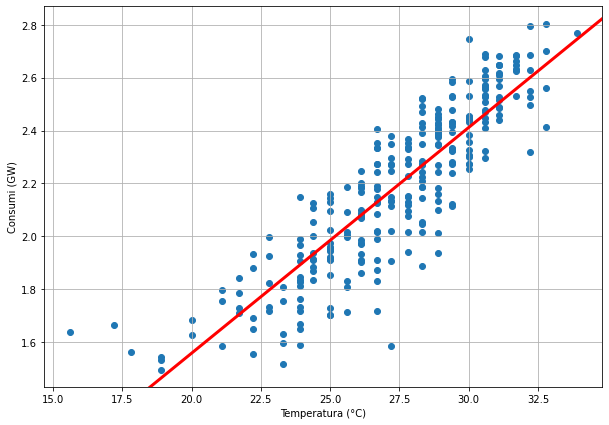

In [30]:
plot_model_on_data(X, y, lrm)

- Il grafico mostra come il modello lineare sia efficace nell'approssimare la distribuzione dei dati

## Iperparametri del modello

- Quando un modello di regressione viene addestrato, vengono individuati i valori ottimali dei suoi _parametri_
  - nel caso della regressione lineare, i parametri sono i _coefficienti angolari_ (uno solo nel caso univariato) e l'_intercetta_
- In alcuni casi, il processo di addestramento stesso ha a sua volta dei parametri che possono essere impostati, detti **_iperparametri_**
- Ogni classe di modello di scikit-learn ha diversi iperparametri che possono essere impostati nel momento in cui si istanzia l'oggetto
- Ad esempio `LinearRegression` ha per iperparametro `fit_intercept`, un flag che indica se calcolare un valore per l'intercetta
  - se `True` (default), nell'addestramento si individua un valore ottimale per l'intercetta
  - se `False`, il valore dell'intercetta viene fissato a 0
- Proviamo ad esempio ad addestrare un modello con `fit_intercept=False`, specificando tale opzione alla creazione dell'oggetto `LinearRegression`

In [31]:
# ni = null intercept
lrm_ni = LinearRegression(fit_intercept=False)

- Come sopra, utilizziamo il metodo `fit` per addestrare il modello

In [32]:
lrm_ni.fit(X, y)

LinearRegression(fit_intercept=False)

- Stampando i parametri del modello vediamo che l'intercetta è 0

In [33]:
lrm_ni.coef_

array([0.079975])

In [34]:
lrm_ni.intercept_

0.0

- Calcoliamo le misure di accuratezza viste sopra (MSE, errore relativo, R²) usando la funzione `print_eval` che abbiamo definito

In [35]:
print_eval(X, y, lrm_ni)

   Mean squared error: 0.022304
       Relative error: 5.72964%
R-squared coefficient: 0.76437


- Il modello è leggermente meno accurato di quello con iperparametri default (`fit_intercept=True`), perché è stato rimosso un grado di libertà sull'addestramento
- Creiamo un grafico personalizzato per confrontare i due modelli, si nota che il modello senza intercetta passa per (0, 0)
  - usiamo la funzione `legend` di matplotlib per assegnare un'etichetta a ciascun elemento inserito nel grafico in ordine e visualizzare una legenda

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


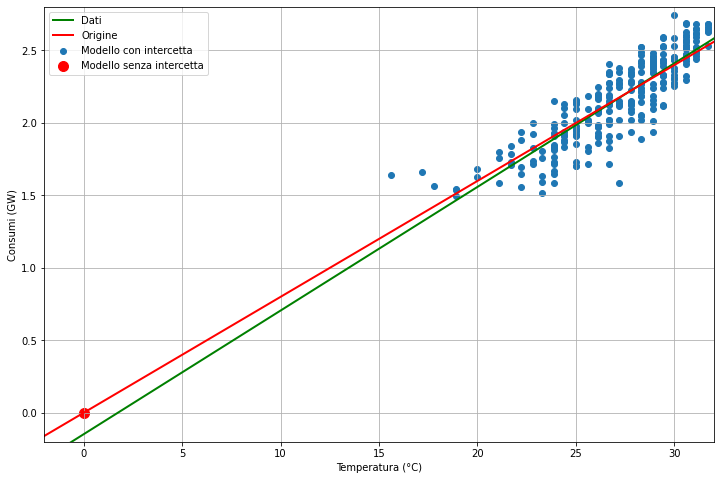

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.scatter(0, 0, s=100, c="red")
line_x = np.linspace(-2, 32, 100)
line_y = lrm.predict(line_x[:, None])
plt.plot(line_x, line_y, c="green", lw=2)
line_y0 = lrm_ni.predict(line_x[:, None])
plt.plot(line_x, line_y0, c="red", lw=2)
plt.legend(["Dati", "Origine", "Modello con intercetta", "Modello senza intercetta"])
plt.xlim((-2, 32))
plt.ylim((-0.2, 2.8))
plt.grid()
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumi (GW)");

## Divisione tra training e validation set

- Abbiamo visto come addestrare un modello di predizione su un set di dati e validarlo calcolandone diverse metriche **basandosi sugli stessi dati**
- Per verificare se un modello generalizza correttamente i dati su cui è addestrato, è importante **validarlo su dati diversi**
- Il metodo _hold-out_ prevede di dividere i dati a disposizione in
  - un _training set_ su cui addestrare il modello
  - un _validation set_ su cui calcolare le metriche di accuratezza del modello addestrato
- La proporzione tra training e validation set è arbitraria, possono essere ad es. 50-50 e 66-33

- Avendo dati in ordine cronologico, è comune utilizzare quelli più antecedenti come training set e quelli più recenti come validation
- In questo caso scegliamo di utilizzare i dati del 2015 come training set e quelli del 2016 e 2017 come validation set
- Definiamo un array booleano che indichi quali dati fanno parte del training set...

In [37]:
is_train = power_summer.index.year < 2016

- ...e lo usiamo per selezionare i dati del training e del validation set
  - l'operatore `~` esegue il NOT elemento per elemento

In [38]:
summer_train = power_summer.loc[is_train]
summer_val = power_summer.loc[~is_train]

## Esercizio 1: Addestramento e validazione modello

- **(1a)** Estrarre esplicitamente il DataFrame della variabila indipendente (`temp`) e la serie della variabile dipendente (`demand`) dai due DataFrame `summer_train` e `summer_val`
- **(1b)** Creare ed addestrare un modello di regressione lineare sul training set `summer_train`
- **(1c)** Stampare le metriche di valutazione viste (MSE, errore relativo, R²) calcolate sullo stesso set
- **(1d)** Stampare le stesse metriche calcolate sul validation set `summer_val`
- **(1e)** Mostrare il grafico del modello sovrapposto al training set
- **(1f)** Mostrare il grafico del modello sovrapposto al validation set

In [39]:
summer_X_train = summer_train[["temp"]]
summer_y_train = summer_train["demand"]
summer_X_val = summer_val[["temp"]]
summer_y_val = summer_val["demand"]

In [40]:
lrm = LinearRegression()
lrm.fit(summer_X_train, summer_y_train)

LinearRegression()

In [41]:
print_eval(summer_X_train, summer_y_train, lrm)

   Mean squared error: 0.020751
       Relative error: 5.56288%
R-squared coefficient: 0.74349


In [42]:
print_eval(summer_X_val, summer_y_val, lrm)

   Mean squared error: 0.026476
       Relative error: 6.33932%
R-squared coefficient: 0.73925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


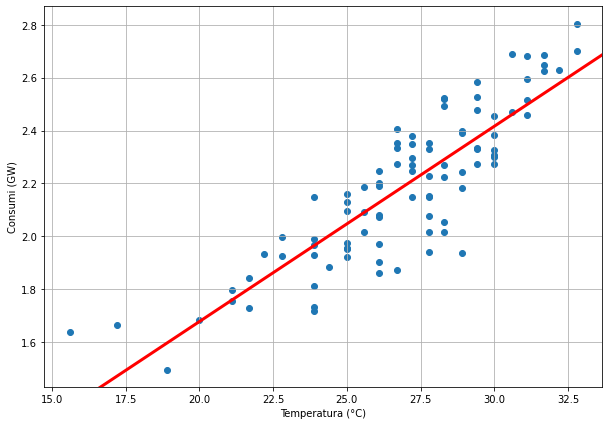

In [43]:
plot_model_on_data(summer_X_train, summer_y_train, lrm)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


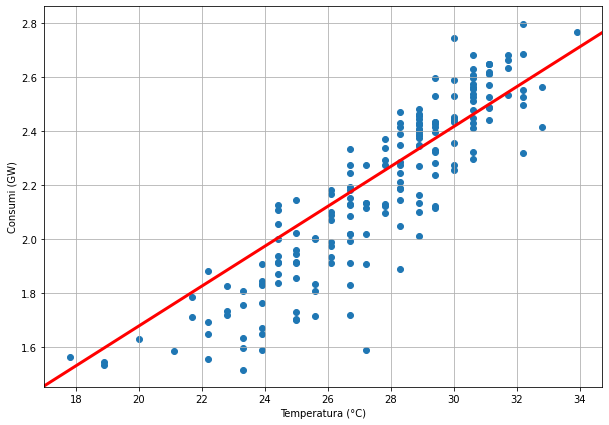

In [44]:
plot_model_on_data(summer_X_val, summer_y_val, lrm)

## Caso di studio 2: predizione dei prezzi delle case

- Riprendiamo dalla scorsa esercitazione il dataset relativo ai prezzi delle case
  - sono fornite informazioni (tasso criminalità, inquinamento, demografia, ...) su diversi quartieri
  - in base a queste va stimato per ciascuno il prezzo mediano delle abitazioni (`MEDV`)
- Forniamo tale dataset già adattato per essere caricato con `read_csv` con le opzioni di default

In [45]:
import os.path
if not os.path.exists("housing.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/fjGjx", "housing.csv")

In [46]:
housing = pd.read_csv("housing.csv")

In [47]:
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


## Divisione training-validation con scikit-learn

- Abbiamo visto il metodo _hold-out_ in cui i dati disponibili sono divisi in training e validation set
- scikit-learn fornisce un'apposita funzione `train_test_split` per suddividere casualmente un set di dati in due insiemi "train" e "test" disgiunti
  - il set di dati è una sequenza di elementi, es. array NumPy o serie/frame pandas
  - con l'opzione `test_size=X` si indica la proporzione (se X decimale tra 0 e 1) o il numero di elementi (se X intero) da inserire nel test (default 0.25, ovvero 25\%)
  - tutti i dati non selezionati per il test sono implicitamente selezionati per il train
  - con l'opzione `random_state` si indica un seed per la riproducibilità: richiamando la funzione più volte con `random_state` e altri parametri uguali viene riprodotta esattamente la stessa suddivisione
- Ad esempio, dividiamo il frame `housing` in due parti `train_data` e `val_data`, contenenti rispettivamente 2/3 e 1/3 dei dati

In [48]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(housing, test_size=1/3, random_state=42)

- I due nuovi frame contengono due sottoinsiemi disgiunti delle righe di `housing`, mescolate casualmente

In [49]:
train_data.shape

(337, 14)

In [50]:
train_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27,19.8


In [51]:
val_data.shape

(169, 14)

In [52]:
val_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6


- A `train_test_split` possiamo passare **due (o più) collezioni** con pari numero di elementi per far sì che siano suddivise insieme, applicando **a tutte lo stesso ordine** casuale dei dati
- Ad esempio separiamo `housing` in due strutture dati allineate:
  - una serie y con i valori della variabile dipendente (`MEDV`)
  - un frame X con i valori delle variabili indipendenti (tutte le altre)

In [53]:
y = housing["MEDV"]
X = housing.drop(columns=["MEDV"])

- Applichiamo quindi `train_test_split` congiuntamente a X e y

In [54]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

- Si può verificare dagli indici che l'ordine delle righe di `X_train` è lo stesso di `y_train` (lo stesso vale per `X_val` e `y_val`)

In [55]:
X_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27


In [56]:
y_train.head(3)

7      27.1
492    20.1
108    19.8
Name: MEDV, dtype: float64

In [57]:
np.array_equal(X_train.index, y_train.index)

True

## Esercizio 2: Regressione su prezzi case

- **(2a)** Creare ed addestrare un modello di regressione lineare sul training set dei prezzi delle case creato sopra composto da `X_train` e `y_train`
- **(2b)** Stampare le metriche di valutazione viste (MSE, errore relativo, R²) calcolate sullo stesso set
- **(2c)** Stampare le stesse metriche calcolate sul validation set composto da `X_val` e `y_val`

In [58]:
mdlc = LinearRegression()
mdlc.fit(X_train, y_train)

LinearRegression()

In [59]:
pred = mdlc.predict(X_train)
print("MSE: ", np.mean(np.square( pred - y_train)))
print("errore relativo: ", np.mean(np.abs( (pred - y_train) / y_train)))
print("coefficiente di determinazione: ", (np.square(pred - y_train)).sum()/(np.square(y_train - np.mean(y_train))).sum()) # non va
print_eval(X_train, y_train, mdlc)

MSE:  23.057499884986026
errore relativo:  0.16695608314421445
coefficiente di determinazione:  0.2610168543033505
   Mean squared error: 23.057
       Relative error: 16.69561%
R-squared coefficient: 0.73898


In [60]:
print_eval(X_val, y_val, mdlc)

   Mean squared error: 20.595
       Relative error: 16.20789%
R-squared coefficient: 0.72621


## Predizione consumi elettrici sull'intero anno

- Riprendiamo il caso di studio sulla predizione dei consumi elettrici dalla temperatura
- I modelli addestrati sopra sono addestrati e validati solamente sui mesi estivi
- È possibile addestrare un modello utilizzabile per la predizione sull'intero anno?
- Iniziamo dividendo l'intero frame `data` in training e validation set ed estraiamo per ciascuno la matrice X e il vettore y

In [61]:
is_train = power.index.year < 2016
X_train = power.loc[is_train, ["temp"]]
y_train = power.loc[is_train, "demand"]
X_val = power.loc[~is_train, ["temp"]]
y_val = power.loc[~is_train, "demand"]

- Addestriamo un nuovo modello sul training set estratto

In [62]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

- Validiamo il modello sia sullo stesso training set che sul validation set

In [63]:
print_eval(X_train, y_train, lrm)

   Mean squared error: 0.09687
       Relative error: 14.17653%
R-squared coefficient: 0.095711


In [64]:
print_eval(X_val, y_val, lrm)

   Mean squared error: 0.097075
       Relative error: 15.39235%
R-squared coefficient: 0.095201


- In entrambi i casi, il modello è poco accurato: lo si deduce in particolare dal coefficiente R² vicino allo zero
- Visualizziamo il modello sovrapposto ai dati (training e validation insieme) per capire perché...

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


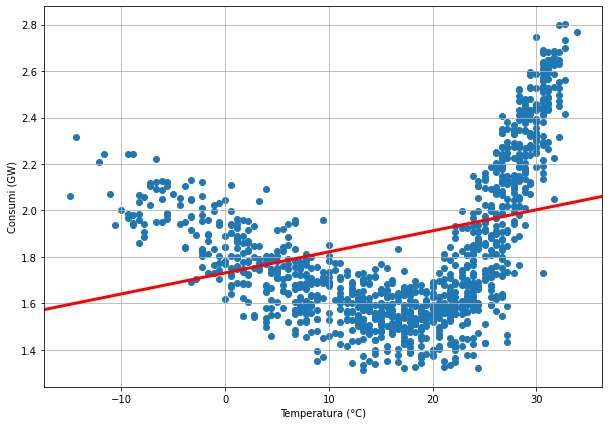

In [65]:
plot_model_on_data(power[["temp"]], power["demand"], lrm)

- Il grafico evidenzia che l'aumento dei consumi si ha sia nelle giornate più calde (a destra) che in quelle più fredde (a sinistra)
- Per questo il consumo non può essere approssimato dalla temperatura in modo soddisfacente con un unico modello lineare (una retta) per tutti i mesi dell'anno

## Regressione polinomiale

- La regressione _polinomiale_ è una generalizzazione di quella lineare in cui il modello include **termini di grado superiore**
- Ad esempio, mentre un modello di regressione lineare su una singola variabile $x$ (_univariata_) ha forma
$$ \hat{y}=\theta_0+\theta_1\cdot x $$
- in un modello polinomiale di secondo grado viene aggiunto un termine col quadrato della variabile, con un proprio coefficiente:
$$ \hat{y}=\theta_0+\theta_1\cdot x+\theta_2\cdot x^2 $$
- Analogamente, in un modello di terzo grado viene aggiunto un ulteriore termine col cubo della variabile:
$$ \hat{y}=\theta_0+\theta_1\cdot x+\theta_2\cdot x^2+\theta_3\cdot x^3 $$
- La regressione polinomiale corrisponde in pratica a quella lineare con l'aggiunta di variabili derivate da quelle esistenti

- Addestriamo ad esempio un modello polinomiale di secondo grado
- Creiamo una matrice `X_train_sq` con i quadrati elemento per elemento di `X_train`

In [66]:
X_train_sq = X_train ** 2

- Usiamo quindi `c_` per unire le due matrici $m\times 1$ in una $m\times 2$

In [67]:
X_train_d2 = np.c_[X_train, X_train_sq]

- Abbiamo quindi un dataset con due variabili, dove la seconda è il quadrato della prima

In [68]:
X_train_d2[:4]

array([[  1.7 ,   2.89],
       [  2.2 ,   4.84],
       [ 14.4 , 207.36],
       [ 15.6 , 243.36]])

- Creiamo come al solito un modello di regressione lineare e addestriamolo con questi dati

In [69]:
prm = LinearRegression()
prm.fit(X_train_d2, y_train)

LinearRegression()

- Possiamo già valutare il modello sul training set stesso

In [70]:
print_eval(X_train_d2, y_train, prm)

   Mean squared error: 0.032695
       Relative error: 7.81509%
R-squared coefficient: 0.69479


- Per valutarlo sul validation set, ricaviamo da esso (`X_val`) una matrice `X_val_d2` come fatto prima per il training set

In [71]:
X_val_d2 = np.c_[X_val, X_val ** 2]

In [72]:
print_eval(X_val_d2, y_val, prm)

   Mean squared error: 0.037151
       Relative error: 8.89180%
R-squared coefficient: 0.65373


- Vediamo che questo modello con l'aggiunta del termine di secondo grado è molto più accurato di quello lineare

## Esercizio 3: Regressione polinomiale di terzo grado

- **(3a)** Creare una matrice `X_train_d3` con tre colonne contenenti rispettivamente i valori di `X_train`, i quadrati e i cubi
- **(3b)** Creare una matrice simile `X_val_d3` basata su `X_val`
- **(3c)** Addestrare un modello di regressione lineare su `X_train_d3`
- **(3d)** Stampare le metriche di valutazione del modello su `X_train_d3` e `X_val_d3`

In [73]:
X_train_d3 = np.c_[X_train_d2, X_train ** 3]

In [74]:
X_val_d3 = np.c_[X_val_d2, X_val ** 3]

In [75]:
mdld3 = LinearRegression()
mdld3.fit(X_train_d3, y_train)

LinearRegression()

In [76]:
print_eval(X_train_d3, y_train , mdld3)
print_eval(X_val_d3, y_val, mdld3)

   Mean squared error: 0.021047
       Relative error: 6.19993%
R-squared coefficient: 0.80352
   Mean squared error: 0.025885
       Relative error: 7.18888%
R-squared coefficient: 0.75874


## Feature polinomiali con scikit-learn

- Per applicare trasformazioni ai dati da fornire ai modelli, scikit-learn fornisce dei _filtri_ con un'interfaccia standard
- Ad esempio, per generare le variabili per la regressione polinomiale, usiamo il filtro `PolynomialFeatures`
- In modo simile ai modelli di predizione, un filtro va dapprima creato, impostandone eventuali iperparametri
- L'iperparametro più importante di `PolynomialFeatures` è `degree`, che indica il grado massimo delle feature da generare

In [1]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

- Come i modelli (es. `LinearRegression`), i filtri vanno "addestrati" con dei dati d'esempio prima di essere utilizzati 
  - nel caso di `PolynomialFeatures`, l'addestramento serve solo a indicare il numero di variabili presenti nei dati in input
- Ad esempio, creiamo una matrice con due osservazioni (righe) di una generica variabile (colonna) $X$

In [77]:
sample = np.array([ [ 2],
                    [-3] ])

- Passiamo ora questa matrice al metodo `fit`: il filtro apprende che i dati sono composti da una singola variabile

In [78]:
poly.fit(sample)

PolynomialFeatures(degree=3)

- Una volta addestrato, possiamo usare il metodo `transform` del filtro per trasformare qualsiasi matrice compatibile, ovvero con una sola colonna
- Trasformiamo ad esempio la stessa matrice usata in `fit`

In [79]:
poly.transform(sample)
#        X^0   X^1   X^2   X^3

array([[  1.,   2.,   4.,   8.],
       [  1.,  -3.,   9., -27.]])

- Dati i valori di $X$, il filtro ha restituito i valori di $X^0, X^1, X^2, X^3$
- I filtri forniscono un metodo `fit_transform` che raggruppa le due operazioni sopra: addestra il modello sui dati passati e li trasforma
  - in pratica va usato `fit_transform` al primo utilizzo di un filtro e `transform` ai successivi

In [80]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(sample)

array([[  1.,   2.,   4.,   8.],
       [  1.,  -3.,   9., -27.]])

- La colonna $X^0$ ha sempre valore 1 ed è inutile nell'addestrare il modello, in quanto sarebbe ridondante con l'intercetta
- Possiamo escluderla impostando l'iperparametro `include_bias=False` sul filtro

In [81]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(sample)

array([[  2.,   4.,   8.],
       [ -3.,   9., -27.]])

- Per addestrare un modello polinomiale possiamo quindi creare il filtro per l'aggiunta delle feature, ad esempio di secondo grado...

In [82]:
poly = PolynomialFeatures(degree=2, include_bias=False)

- ...e addestrare un modello lineare con i dati trasformati

In [83]:
prm = LinearRegression()
X_train_sq = poly.fit_transform(X_train)
prm.fit(X_train_sq, y_train)

LinearRegression()

- In seguito, i valori della _x_ dovranno sempre essere trasformati con lo stesso filtro, utilizzando il metodo `transform`
- Ad esempio, per ottenere i consumi predetti a fronte di temperature di -5 °C, 5 °C e 25 °C...

In [84]:
sample = [ [-5], [5], [25] ]
sample_sq = poly.transform(sample)
prm.predict(sample_sq)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([2.0611981 , 1.6400669 , 1.96642686])

- Per ottenere invece le metriche d'accuratezza...

In [85]:
X_val_sq = poly.transform(X_val)
print_eval(X_val_sq, y_val, prm)

   Mean squared error: 0.037151
       Relative error: 8.89180%
R-squared coefficient: 0.65373


## Pipeline

- Ad ogni interazione col modello `prm` sopra dobbiamo esplicitamente trasformare i dati in ingresso col filtro `poly`
- scikit-learn permette di integrare uno o più filtri con un modello creando una **_pipeline_**
- Una volta costruita, la pipeline offre la **stessa API del modello** di predizione incapsulato, ma **applica automaticamente i filtri** ai dati prima di passarli al modello
  - chiamando `fit`, i filtri sono addestrati e applicati (`fit_transform`) sui dati di addestramento
  - chiamando `predict` (o `score`), i filtri già tarati sono applicati ai nuovi dati (`transform`)
- Ad esempio, per incapsulare il modello polinomiale visto sopra in un oggetto unico, usiamo una pipeline con il filtro `PolynomialFeatures` e il modello lineare
  - al costruttore va passata la lista dei componenti **in ordine di applicazione**, ciascuno rappresentato da una tupla con nome e componente

In [86]:
from sklearn.pipeline import Pipeline
prm = Pipeline([
    # nome     elemento
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])

- Possiamo ora eseguire le stesse operazioni vista sopra sul modello, ma con la trasformazione dei dati applicata in automatico

In [87]:
prm.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])

In [88]:
prm.predict([ [-5], [5], [25] ])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([2.0611981 , 1.6400669 , 1.96642686])

In [89]:
print_eval(X_val, y_val, prm)

   Mean squared error: 0.037151
       Relative error: 8.89180%
R-squared coefficient: 0.65373


- Tramite l'attributo `named_steps` della pipeline possiamo accedere ai singoli componenti
  - funziona come un dizionario le cui chiavi sono i nomi assegnati ai componenti nel costruttore

In [ ]:
prm.named_steps.keys()

dict_keys(['poly', 'linreg'])

- Possiamo ad esempio reperire il modello di regressione lineare `linreg`...

In [ ]:
prm.named_steps["linreg"]

LinearRegression()

- ...e vedere i pesi assegnati alle due variabili, nell'ordine X e X²

In [ ]:
prm.named_steps["linreg"].coef_

array([-0.04211312,  0.0019477 ])

## Curva del modello polinomiale

- Visualizzando il modello polinomiale di secondo grado in un grafico, vediamo che ha la forma di una funzione $a\cdot x^2+b\cdot x+c$, ovvero una parabola

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


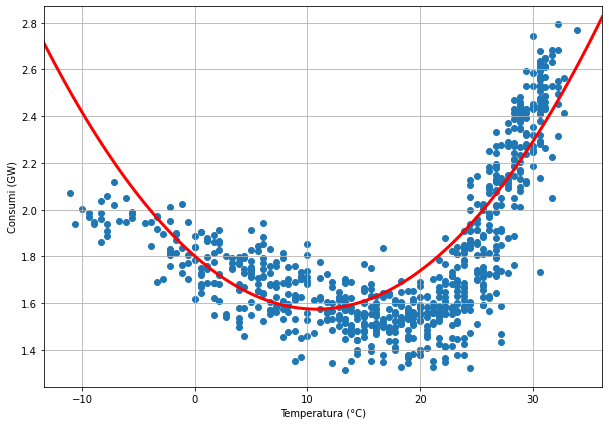

In [90]:
plot_model_on_data(X_val, y_val, prm)

- Come anche confermato dalle misure di errore, questo modello approssima molto meglio il consumo in base alla temperatura rispetto a quello lineare

## Esercizio 4: Regressione polinomiale con pipeline

- **(4a)** Creare un modello di regressione polinomiale di terzo grado usando una pipeline come sopra
- **(4b)** Addestrare il modello sui dati di training
- **(4c)** Stampare le misure di accuratezza del modello calcolate sui dati di training e su quelli di validazione
- **(4d)** Visualizzare il grafico del modello sovrapposto ai dati di validazione

In [94]:
plrm = Pipeline([("poly", PolynomialFeatures(degree=3, include_bias=False)),
                ("model", LinearRegression())])

In [95]:
plrm.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [96]:
print_eval(X_train, y_train, plrm)
print_eval(X_val, y_val, plrm)

   Mean squared error: 0.021047
       Relative error: 6.19993%
R-squared coefficient: 0.80352
   Mean squared error: 0.025885
       Relative error: 7.18888%
R-squared coefficient: 0.75874


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


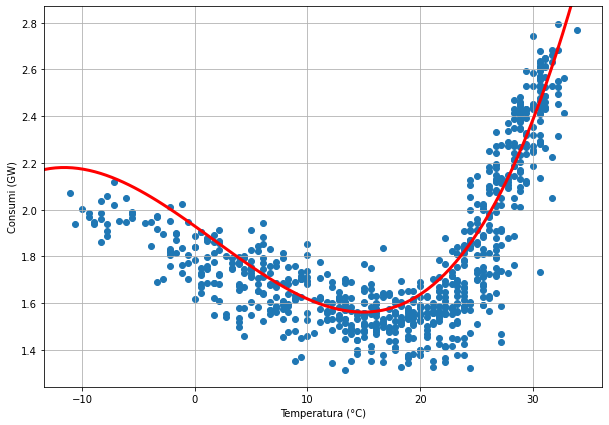

In [97]:
plot_model_on_data(X_val, y_val, plrm)

## Standardizzazione dei dati

- Data una variabile $X$ con media $\mu$ e deviazione standard $\sigma$, la sua versione "standard" è calcolata come
$$ Z = \frac{X-\mu}{\sigma} $$
- $Z$ mantiene la distribuzione dei dati di $X$, ma con media 0 e deviazione standard 1
- In presenza di più variabili con scale diverse, applicare la standardizzazione a ciascuna di esse è utile per uniformarne i valori
- Questo può migliorare l'accuratezza dei modelli di regressione

- La standardizzazione si esegue col filtro `StandardScaler`

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- Eseguendo `fit_transform` (o `fit`) il filtro memorizza medie e deviazioni standard dei dati passati, salvate negli attributi `mean_` e `scale_`

In [99]:
scaler.fit_transform([[0.001, 4000],
                      [0.002, 2500],
                      [0.004, 1000]])

array([[-1.06904497,  1.22474487],
       [-0.26726124,  0.        ],
       [ 1.33630621, -1.22474487]])

In [100]:
scaler.mean_

array([2.33333333e-03, 2.50000000e+03])

In [101]:
scaler.scale_

array([1.24721913e-03, 1.22474487e+03])

- Successivamente `transform` trasformerà ulteriori dati secondo medie e deviazioni memorizzate

In [ ]:
scaler.transform([ [0.01, 100] ])

array([[ 6.14700856, -1.95959179]])

- Addestriamo un modello polinomiale di secondo grado come quello sopra, ma applicando la standardizzazione alle variabili $X$ e $X^2$
- Per far ciò, basta aggiungere il filtro alla pipeline

In [102]:
prm = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scale",  StandardScaler()),   # <- aggiunto
    ("linreg", LinearRegression())
])
prm.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler()), ('linreg', LinearRegression())])

- Valutiamo l'accuratezza del modello

In [103]:
print_eval(X_val, y_val, prm)

   Mean squared error: 0.037151
       Relative error: 8.89180%
R-squared coefficient: 0.65373


- In questo caso le metriche di accuratezza non sono cambiate standardizzando i dati
- Ma cosa succede con più variabili con ordini di grandezza molto diversi?

## Normalizzazione min-max dei dati

- Una tecnica alternativa alla standardizzazione per preprocessare dati in scale diverse è la _normalizzazione minimo-massimo_, che porta i valori di ogni variabile in un intervallo prestabilito, di solito tra 0 e 1
- Data una generica variabile $X$, la sua normalizzazione $N$ si calcola come
$$ N=\frac{X-\min(X)}{\max(X)-\min(X)}$$
- Tale trasformazione si effettua col filtro `MinMaxScaler`

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

- Addestrando il filtro, vengono salvati gli attributi `min_` ($\min(X)$) e `scale_` ($\frac{1}{\max(X)-\min(X)}$) usati per effettuare la normalizzazione

In [105]:
scaler.fit_transform([[0.001, 4000],
                      [0.002, 2500],
                      [0.004, 1000]])

array([[0.        , 1.        ],
       [0.33333333, 0.5       ],
       [1.        , 0.        ]])

In [106]:
scaler.min_

array([-0.33333333, -0.33333333])

In [ ]:
scaler.scale_

array([3.33333333e+02, 3.33333333e-04])

## Esercizio 5: Normalizzazione

- **(5a)** Addestrare sul training set un modello di regressione polinomiale di grado 15 (con variabili $X,X^2,\ldots,X^{15}$) e verificarne le misure di accuratezza sul validation set
- **(5b)** Ripetere il punto 4a, ma applicando la standardizzazione dei dati nel modello
- **(5c)** Ripetere il punto 4a, ma applicando la normalizzazione min-max dei dati nel modello

Avendo a che fare con molte variabili di ordini di grandezza diversi, la standardizzazione contribuisce a migliorare l'accuratezza

In [113]:
mdl15 = Pipeline([ ("poly", PolynomialFeatures(degree=15, include_bias=False)),
                   ("model", LinearRegression())])
mdl15.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('model', LinearRegression())])

In [112]:
mdl15_std = Pipeline([ ("poly", PolynomialFeatures(degree=15, include_bias=False)),
                   ("std", StandardScaler()),
                   ("model", LinearRegression())])
mdl15_std.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('std', StandardScaler()), ('model', LinearRegression())])

In [111]:
mdl15_nrm = Pipeline([ ("poly", PolynomialFeatures(degree=15, include_bias=False)),
                    ("reg", MinMaxScaler()),
                    ("model", LinearRegression())])
mdl15_nrm.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15, include_bias=False)),
                ('reg', MinMaxScaler()), ('model', LinearRegression())])

In [114]:
for model in [mdl15, mdl15_std, mdl15_nrm]:
  print_eval(X_val, y_val, model)

   Mean squared error: 0.030805
       Relative error: 7.69267%
R-squared coefficient: 0.71288
   Mean squared error: 0.024899
       Relative error: 6.89330%
R-squared coefficient: 0.76793
   Mean squared error: 0.024899
       Relative error: 6.89330%
R-squared coefficient: 0.76793
